# Exploring Molecular Motions

Molecules twist, bend, rotate and move and how they do it is vital for their functionality. In this notebook we will learn how to use a package called prody to explore how molecules might move given their structure.

We'll start up with simple molecules ($CO_{2}$, cyclohexane, fullerene) and go to the more relevant ones like DNA and proteins.

A big part of this project is being able to visualize what you are doing, so we'll use the python notebook to handle molecules and another application (VMD) to visualize the structures and their movements.


In [1]:
%matplotlib notebook
'''
    Load the prody module that has all the functionality.
    You can install prody by doing:
    pip install -U prody
    More information at http://prody.csb.pitt.edu
'''
import prody

We need to work with molecules. In the git repository you should have a few files named "*.pdb" which contain the atomic coordinates of your molecules. This is a standard format heavily used to study biomolecules. In the advanced module you will see how you can also use it to automatically download and use any of the close to 100,000 proteins and nucleic acids for which we know the structure.

We will start by a simple molecule, carbon dioxide.

In [2]:
pdb = prody.parsePDB('co2.pdb')

@> 3 atoms and 1 coordinate set(s) were parsed in 0.00s.


Want to know how it looks like? Start the VMD application and let''s find out. You have two screens, the first one saying VMD in big letters is where your molecules will show up. The second one you will use it to load molecules and change their appearance. Go to File, new molecule. In the new window "Browse" to your directory where the co2.pdb file is at and click on load.

Let's customize how this molecule looks: Graphics-->representations
From the new menu choose CPK from thr Drawing Method drop down menu. Now it should look more like a molecule. You can see the individual atoms and identify the carbon and the oxygens.

With prody you can get all the information on the system. Just look at different functions that pop up when you look write pdb. and hit tab. Same with prody. Let's see some of them in action.

In [3]:
# The object contains information about the name of 
# the file we loaded and the number of atoms on it.
pdb

<AtomGroup: co2 (3 atoms)>

In [4]:
# Often getting residue numbers, indices, atoms names and coordinates comes in handy 
# for checking your molecule, modifying it, ...
pdb.getNames()

array(['C', 'O1', 'O2'], 
      dtype='|S6')

In [5]:
pdb.getResnums()

array([1, 1, 1])

In [6]:
pdb.getCoords()

array([[ 0. ,  0. ,  0. ],
       [ 1.3,  0. ,  0. ],
       [-1.3,  0. ,  0. ]])

In [7]:
# Translating the coordinates is easy
pdb.setCoords(pdb.getCoords()+3.0)

In [8]:
pdb.getCoords()

array([[ 3. ,  3. ,  3. ],
       [ 4.3,  3. ,  3. ],
       [ 1.7,  3. ,  3. ]])

In [9]:
# select individual atoms or more complex selections by residue, molecule, ...
carbon = pdb.select('name C')

In [10]:
carbon

<Selection: 'name C' from co2 (1 atoms)>

In [11]:
carbon.getCoords()

array([[ 3.,  3.,  3.]])

In [12]:
prody.calcDistance(pdb.select('name O1'),pdb.select('name O2'))

array([ 2.6])

In [13]:
# Or even better get a matrix of distances between atoms
dist = prody.buildDistMatrix(pdb)
dist

array([[ 0. ,  1.3,  1.3],
       [ 1.3,  0. ,  2.6],
       [ 1.3,  2.6,  0. ]])

<IPython.core.display.Javascript object>


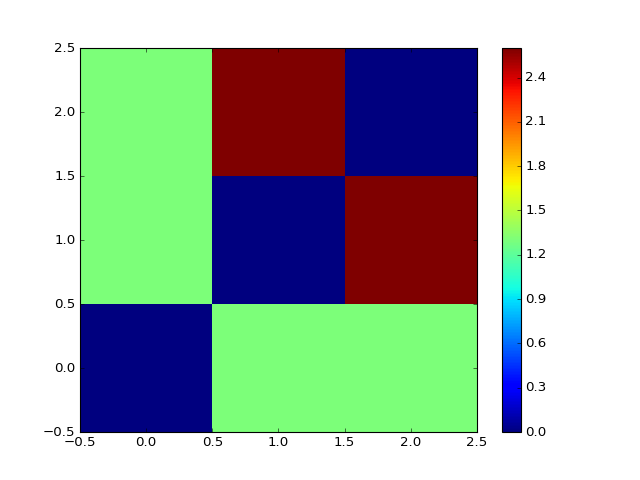

(<matplotlib.image.AxesImage at 0x10ddbd350>,
 <matplotlib.colorbar.Colorbar at 0x10de53490>)

In [14]:
# you can visualize this matrix
prody.showHeatmap(dist)

Let's start looking at how this molecule might behave. To do that we are going to use the ANM fucntionality (anisotropic normal modes). Based on the geometry of the molecule they give an approximation to how the individual atoms in the molecule might move.

In [15]:
# First create an ANM object with a name.
anm = prody.ANM('CarbonDioxide')

In [16]:
# Use the molecules'coordinates to construct a Hessian, which dictates how the atoms 
# will move
anm.buildHessian(pdb)

@> Hessian was built in 0.00s.


In [17]:
# Once you have that you calculate the directions in which each atom moves
anm.calcModes()

@> WARNING More than 6 zero eigenvalues are calculated.
@> 2 modes were calculated in 0.01s.


In [18]:
# Those directions can be saved into a format that VMD can read
prody.writeNMD('CO2.nmd',anm[:2],pdb)

'CO2.nmd'

You can now go ahead and load this file into VMD. To do so:
Go to Extensions-->Analysis-->Normal Mode Wizard
This will create a small menu, from which you will choose to "Load NMD file" and proceed to load the file name CO2.nmd.

You will instally see some arrows appearing on the screen on top of your atoms and a new menu. The arrows indicate directions of motion. The default setup is for large molecules such as proteins, so let's modify this a bit. In the menu, set the RMSD to 0.1. Now it's easier to see what's going on: the two oxygens move in one direction and the carbon in opposite direction. 

Let's animate this. In the menu, go down to where it says Actions. First line saying mode represents the arrows. Hit on the hide button. You are going to hit "Make" in the next row "animation". You just need to do one extra thing: go to the "Graphical Representations" menu, and choose Drawing Method: "CPK".

Can you do the same for the second mode? What does it look like?

In [19]:
# Of course, with the anm method you can get a bunch of properties as well, 
# feel free to explore
anm.getHessian()

array([[ 2.,  0.,  0., -1., -0., -0., -1.,  0.,  0.],
       [ 0.,  0.,  0., -0., -0., -0.,  0., -0., -0.],
       [ 0.,  0.,  0., -0., -0., -0.,  0., -0., -0.],
       [-1., -0., -0.,  2.,  0.,  0., -1.,  0.,  0.],
       [-0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.],
       [-0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.],
       [-1.,  0.,  0., -1.,  0.,  0.,  2.,  0.,  0.],
       [ 0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.],
       [ 0., -0., -0.,  0., -0., -0.,  0.,  0.,  0.]])

In [20]:
prody.calcCollectivity(anm[0])

0.66666666666666663

In [21]:
prody.calcCollectivity(anm[1])

0.79370052598410001

# Water

Let's look at another important molecule: water. You will follow the same steps as before to find out what are the most likely direction of deformation. Take a look at the first three directions, what do they look like?
Use wat.pdb

# Cyclohexane

A little more complex. Can you identify movements that will create the boat or chair conformations? Start off from the cyclohexane.pdb. Are all the neighboring carbons equidistant? 

# Fullerene

Here is the molecule that's got all the buzz in nanomaterials. It is made of 60 Carbons, and it looks like a soccer ball. How does it deform? Start from fullerene.pdb